# Итоговый проект

Данный модуль является заключительным для обязательных глав курса по SageMath. В рамках итогового проекта студент должен будет выполнить одну объемную задачу, покрывающую в той или иной степени все рассмотренные темы: от символьных вычислений и графиков, до основ линейной алгебры в Sage. Прошу обратить внимание, что Ваша работа будет проверяться такими же студентами, как и Вы, поэтому:
1. Грамотно оформляйте свою работу, пишите подробные комментарии, что вы делаете (либо же вставляйте в Ваше копию блокнота блоки Markdown, содержащие пояснения). 
2. Работа будет считаться выполненной только после того, как автор работы проверит не менее 3-х работ других студентов.

## Условие задания

В данной работе Вам будет необходимо привести к каноническому виду уравнения кривой и поверхности второго порядка по данному Вам варианту. Просьба, после этого блока вставить блок Markdown с указанием номера Вашего варианта. План работы над заданием:
1. Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде.
2. Построить графики заданной кривой и поверхности. Обратить внимание на расположение координаты 0, 0.
3. Привести аналитически (например, методом ортогонального преобразования) квадратичные формы, описывающие кривую и поверхность второго порядка к каноническому виду.
4. Построить графики приведенных к каноническому виду кривой и поверхности второго порядка. 
5. Сделать выводы, оформить блокнот.

#### Вариант: 5

Задана следующая квадратичная форма:
    $$ y^2-x^2/10-2xy-x-y=0 $$
Также задана следующая поверхность:
    $$ 2x^2+11y^2+11z^2+12xy+12xz+24yz=0 $$


##### 1. Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде.

In [37]:
# инициализация
var('y z')

# уравнение кривой
graph_eq = y^2 - (x^2)/10 - 2*x*y - x-y == 0
# уравнение поверхности
area_eq = 2*x^2 + 11*y^2 + 11*z^2 + 12*x*y + 12*x*z + 24*y*z == 0

##### 2. Построить графики заданной кривой и поверхности. Обратить внимание на расположение координаты 0, 0.

Построим график заданной кривой:

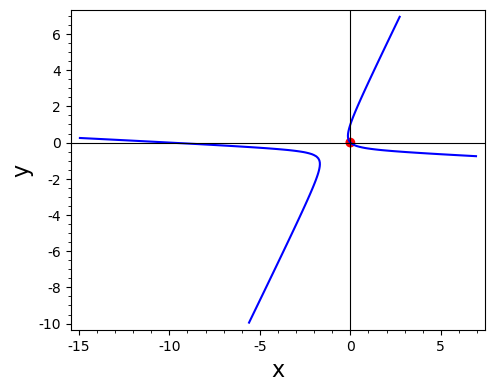

In [38]:
# границы графика по x и y
x_range = (-15, 7)
y_range = (-10, 7)

# график кривой
graph = implicit_plot(graph_eq, x_range, y_range)
# добавляем отображение точки (0, 0)
graph += point((0, 0), color='red', size=50)
graph.show(axes=True, axes_labels=['x', 'y'])
# убираем точку (0, 0)
graph = implicit_plot(graph_eq, x_range, y_range)

Теперь найдем асимптоты (при наличии) и также добавим их на график:

**Алгоритм построения ассимптот.**

Ассимптота - прямая, обладающая тем свойством, что расстояние от точки: $(x, f(x))$ графика функции до этой прямой стремится к нулю при неограниченном удалении точки графика от начала координат. Задается уравнением вида:
$$ y = kx +  b $$
У функции может не быть ассимптот, а может и быть бесконечно много, тут так сразу не угадаешь. Благо, жизнь нам предлагает алгоритм по нахождению ассимптот функции, при этом этот же алгоритм позволяет доказать, что ассимптот не существует.

Ассимптота существует, если оба предела: $$\lim_{x\to \infty} \frac{f(x)}{x}=k$$  и  $$\lim_{x\to \infty} {f(x)-kx}=b$$ существуют и не равны бесконечности.

Но жестокая судьба так и шепчет, что не все так просто. И действительно, ведь функция, заданная выше, задана неявно, а значит, для нахождения ее ассимптот нужны более общие правила.

Имеем что-то вроде: $$F(x,y)=0 $$  Пусть асимптота описывается уравнением $y=kx+b$, тогда, подставляя это выражение для $y$ в уравнение кривой, получаем алгебраическое уравнение относительно одной переменной $x$:
$${A_0}{x^n} + {A_1}{x^{n - 1}} +  \ldots  + {A_{n - 1}}x + {A_n} = 0$$

где коэффициенты $A_i$зависят от параметров асимптоты $k$ и $b$ (причем коэффициент $A_0$ зависит лишь от $k$). Значения $k$ и $b$ определяются из условия:
$$\left\{ \begin{array}{l}
{A_0}\left( k \right) = 0\\
{A_1}\left( {k,b} \right) = 0
\end{array} \right..$$

Для нахождения вертикальной асимптоты нужно подставить ее уравнение $x=a$ в уравнение кривой и преобразовать последнее к виду:

$${B_0}{y^n} + {B_1}{y^{n - 1}} +  \ldots  + {B_{n - 1}}y + {B_n} = 0$$

Необходимым условием существования вертикальной асимптоты является отсутствие в последнем уравнении старшего члена ${B_0}{y^n}$ Значение параметра $a$ определяется из условия:
$${B_1}\left( a \right) = 0$$

Приведенные формулы для асимптот неявно заданных кривых справедливы, если кривая не имеет особых точек на бесконечности.

Подставим $ y = kx+b$ в уравнение и приведем подобные:

In [39]:
var('k b')

# делаем подстановку
polynom_kb = graph_eq.substitute(y=k*x+b)
print(f"1) {polynom_kb}")

# раскрываем скобки
polynom_kb = polynom_kb.expand()
print(f"2) {polynom_kb}")

# приводим подобные
polynom_kb = polynom_kb.left().collect(x) == 0
print(f"3) {polynom_kb}")

1) (k*x + b)^2 - 2*(k*x + b)*x - k*x - 1/10*x^2 - b - x == 0
2) k^2*x^2 + 2*b*k*x - 2*k*x^2 + b^2 - 2*b*x - k*x - 1/10*x^2 - b - x == 0
3) 1/10*(10*k^2 - 20*k - 1)*x^2 + b^2 + (2*b*k - 2*b - k - 1)*x - b == 0


Далее возьмем коэфициенты при двух старших степенях х.

In [40]:
# получаем коэффициенты
x2_coeff = polynom_kb.left().coefficient(x^2)
x1_coeff = polynom_kb.left().coefficient(x)
print(f"x^2 coeff = {x2_coeff}")
print(f"x coeff = {x1_coeff}")

x^2 coeff = k^2 - 2*k - 1/10
x coeff = 2*b*k - 2*b - k - 1


И, наконец, решим систему из полученных уравнений, найдя k и b:

In [41]:
# уравнения системы
eq2 = x2_coeff == 0
eq1 = x1_coeff == 0
# решение системы
solve_eq = solve((eq2, eq1), k, b)
print(f"Solve 1: k = {solve_eq[0][0].right()}, b = {solve_eq[0][1].right()}")
print(f"Solve 2: k = {solve_eq[1][0].right()}, b = {solve_eq[1][1].right()}")

Solve 1: k = -1/10*sqrt(110) + 1, b = -1/11*sqrt(110) + 1/2
Solve 2: k = 1/10*sqrt(110) + 1, b = 1/11*sqrt(110) + 1/2


Теперь остается добавить на график обе ассимптоты:

asympt1: y = -1/10*x*(sqrt(110) - 10) - 1/11*sqrt(110) + 1/2,
asympt2: y = 1/10*x*(sqrt(110) + 10) + 1/11*sqrt(110) + 1/2


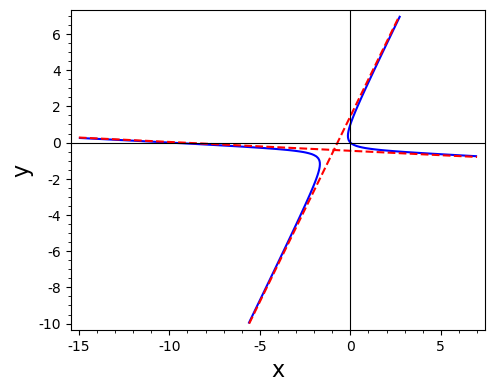

In [42]:
# уравнения ассимптот
asympt1 = solve_eq[0][0].right() * x + solve_eq[0][1].right()
asympt2 = solve_eq[1][0].right() * x + solve_eq[1][1].right()

print(f"asympt1: y = {asympt1},")
print(f"asympt2: y = {asympt2}")

# добавим на график ассимптоты
graph += implicit_plot(y == asympt1, x_range, y_range, color="red", linestyle="--")
graph += implicit_plot(y == asympt2, x_range, y_range, color="red", linestyle="--")
graph.show(axes=True, axes_labels=["x", "y"])

1. Теория по построению асимптот неявно заданной функции
2. Задание на нахождение производной неявно заданной функции
3. Построить график производной функции, которая задает кривую 2-го порядка (синим цветом выделить промежутки убывания функции, красным - возрастания).
4. Заставить найти точку пересечения асимптот

Осталось только найти точку пересечения ассимптот:

In [43]:
# решим уравнение для поиска точки пересечения
x_point = solve(asympt1 == asympt2, x)
print(f"Точка пересечения ассимптот: x = {x_point[0].right().n(32)}, y = {asympt1(x_point[0].right()).n(32)}")

Точка пересечения ассимптот: x = -0.909090909, y = -0.409090909


Теперь построим график поверхности второго порядка:

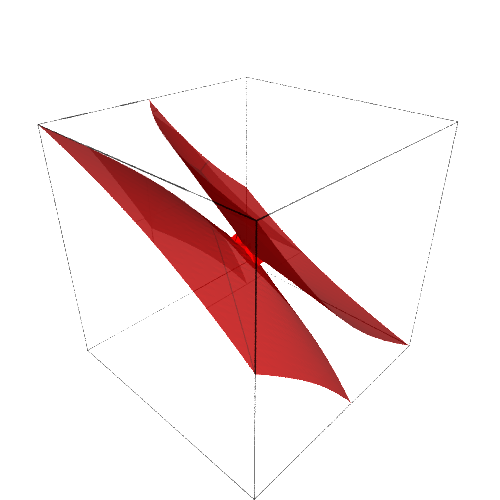

In [44]:
# зададим границы графика
x_range = (-10, 10)
y_range = (-10, 10)
z_range = (-10, 10)

P3d = implicit_plot3d(area_eq, x_range, y_range, z_range, adaptive=True, color='red', opacity='0.9')
P3d.show(axis=True, viewer='tachyon')

##### 3. Привести аналитически (например, методом ортогонального преобразования) квадратичные формы, описывающие кривую и поверхность второго порядка к каноническому виду.

Для удобной работы с уравнением кривой второго порядка, само уравнения надо представить в виде суммы некоей квадратичной формы и линейного функционала. В данном случае часть уравнения, являющаяся КФ имеет вид:
                           $$ y^2-x^2/10-2xy $$
Линейная часть выглядит так:
 $$ -x-y $$
Введем теперь вектор $v$:
$$ v = v_e = (x, y)^T $$
Тогда если обозначить матрицу квадратичной формы за $Q$, а матрицу линейного функционала за $L$, то наше уравнение примет следующий вид:
$$ v^T * Q * v + L*v = 0$$

Текущая задача заключается в том, чтобы составить матрицы Q и L:
(Замечание: в SageMath существует объект QuadraticForm, который позволяет работать не с абстрактными матрицами, а с матрицами именно квадратичной формы. Решение, реализованное не по шаблону, с использованием QuadraticForm также будет приниматься, но рассматриваться в ноутбуке не будет).

In [45]:
# кривая
graph_Q = matrix([[-1/10, -1],
                     [-1,  1]])
graph_L = matrix([-1, -1])

# поверхность
area_Q = matrix([[2,  6,  6],
                 [6, 11, 12],
                 [6, 12, 11]])
area_L = matrix([0, 0, 0])

Теперь нам нужно диагонализировать матрицу КФ: для этого нам нужно перейти из стандартного базиса к базису из собственных векторов. Следовательно, следует найти собственные числа и векторы матрицы $Q$:

In [46]:
# получаем собственные числа и векторы для кривой
eigen_data = graph_Q.eigenvectors_right()
graph_eigen_data = []
# вывод для кривой
print("Собственные числа и векторы для кривой:")
for eigen_val, eigen_vects, _ in eigen_data:
    for eig_vect in eigen_vects:
        print(f"Собственное число: {eigen_val.n(32)}, собственный вектор: {eig_vect.n(32)}")
        graph_eigen_data.append((eigen_val, eig_vect))

print()

# получаем собственные числа и векторы для поверхности
eigen_data = area_Q.eigenvectors_right()
area_eigen_data = []
# вывод для поверхности
print("Собственные числа и векторы для поверхности:")
for eigen_val, eigen_vects, _ in eigen_data:
    for eig_vect in eigen_vects:
        print(f"Собственное число: {eigen_val.n(32)}, собственный вектор: {eig_vect.n(32)}")
        area_eigen_data.append((eigen_val, eig_vect))


Собственные числа и векторы для кривой:
Собственное число: -0.691271221, собственный вектор: (1.00000000, 0.591271221)
Собственное число: 1.59127122, собственный вектор: (1.00000000, -1.69127122)

Собственные числа и векторы для поверхности:
Собственное число: 26.0000000, собственный вектор: (1.00000000, 2.00000000, 2.00000000)
Собственное число: -1.00000000, собственный вектор: (1.00000000, 0.000000000, -0.500000000)
Собственное число: -1.00000000, собственный вектор: (0.000000000, 1.00000000, -1.00000000)


Получив собственные векторы матрицы можно задать матрицу перехода от стандартного базиса в $R^2$ к базису из собственных векторов. Запишем матрицу перехода, составив ее из собственных векторов и при необходимости избавившись от дробей в векторах (вектора следует нормировать):

In [47]:
# нормализуем векторы кривой
eigen_vectors = [graph_eigen_data[0][1], graph_eigen_data[1][1]]
for i in range(0, len(eigen_vectors)):
    eigen_vectors[i] /= eigen_vectors[i].norm()

# матрица перехода для кривой
transition_matrix_graph = matrix([[eigen_vectors[0][0], eigen_vectors[1][0]],
                                  [eigen_vectors[0][1], eigen_vectors[1][1]]])
print("Матрица перехода для кривой:")
print(transition_matrix_graph)
print()

# нормализуем векторы поверхности
eigen_vectors = [area_eigen_data[0][1], area_eigen_data[1][1], area_eigen_data[2][1]]
for i in range(0, len(eigen_vectors)):
    eigen_vectors[i] /= eigen_vectors[i].norm()

# матрица перехода для поверхности
transition_matrix_area = matrix([[eigen_vectors[0][0], eigen_vectors[1][0], eigen_vectors[2][0]],
                                  [eigen_vectors[0][1], eigen_vectors[1][1], eigen_vectors[2][1]],
                                  [eigen_vectors[0][2], eigen_vectors[1][2], eigen_vectors[2][2]]])
print("Матрица перехода для поверхности:")
print(transition_matrix_area)

Матрица перехода для кривой:
[ 0.8607899714135138?  0.5089603374664101?]
[ 0.5089603374664101? -0.8607899714135138?]

Матрица перехода для поверхности:
[         1/3  2/5*sqrt(5)            0]
[         2/3            0  1/2*sqrt(2)]
[         2/3 -1/5*sqrt(5) -1/2*sqrt(2)]


Теперь проверим равенство норм обоих собственных векторов (также обратим внимение, что здесь используется стандартная евклидова, т.е. вторая, норма):

In [48]:
# равенство норм собственных векторов кривой
print(transition_matrix_graph[0:2, 0].norm().n(32) == transition_matrix_graph[0:2, 1].norm().n(32))
# равенство норм собственных векторов поверхности
print(transition_matrix_area[0:3, 0].norm().n(32) == transition_matrix_area[0:3, 1].norm().n(32) == transition_matrix_area[0:3, 2].norm().n(32))

True
True


Перепишем теперь матрицу $Q$ в новом базисе:

In [49]:
# переход к новому базису по формуле Q_new= T^-1 * Q * T
graph_Q_new_basis = transition_matrix_graph.inverse() * graph_Q * transition_matrix_graph
area_Q_new_basis = transition_matrix_area.inverse() * area_Q * transition_matrix_area

print("Матрица Q для кривой в новом базисе:")
print(graph_Q_new_basis.n(32))
print()
print("Матрица Q для поверхности в новом базисе:")
print(area_Q_new_basis.n(32))

Матрица Q для кривой в новом базисе:
[   -0.691271221 -2.71050543e-20]
[ 5.42101086e-20      1.59127122]

Матрица Q для поверхности в новом базисе:
[ 26.0000000 0.000000000 0.000000000]
[0.000000000 -1.00000000 0.000000000]
[0.000000000 0.000000000 -1.00000000]


Теперь подставим полученные переменные в наше исходное уравнение:

In [50]:
# кривая
V = matrix([[x], [y]])
graph_new = ((V.T * graph_Q_new_basis * V + graph_L * V).expand()[0][0] == 0)
print(f"Кривая: {graph_new}")

# поверхность
V = matrix([[x], [y], [z]])
area_new = (V.T * area_Q_new_basis * V + area_L * V).expand()[0][0] == 0
print(f"Поверхность: {area_new}")

Кривая: -0.6912712210513327?*x^2 + 1.591271221051333?*y^2 - x - y == 0
Поверхность: 26*x^2 - y^2 - z^2 == 0


Для проверки решения снова построим график:

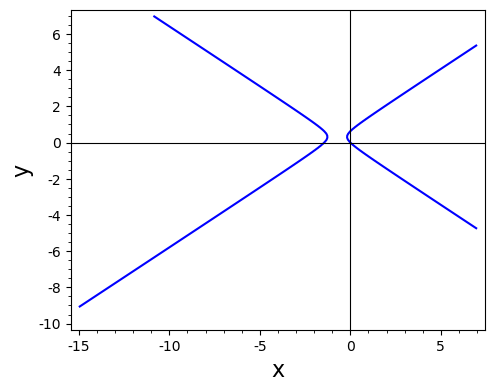

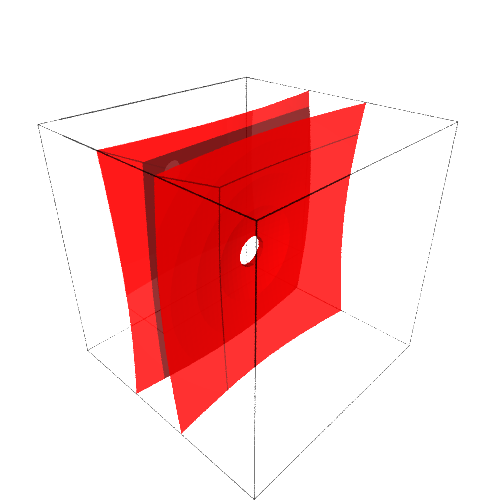

In [51]:
# границы графика кривой
x_range = (-15, 7)
y_range = (-10, 7)

# график кривой
graph = implicit_plot(graph_new, x_range, y_range)
graph.show(axes=True, axes_labels=['x', 'y'])

# границы графика поверхности
x_range = (-10, 10)
y_range = (-10, 10)
z_range = (-10, 10)

# график поверхности
P3d = implicit_plot3d(area_new, x_range, y_range, z_range, adaptive=True, color='red', opacity='0.9')
P3d.show(axis=True, viewer='tachyon')


Мы должны были добиться поворота графика таким образом, чтобы он стал параллелен одной из осей координат. Остались только последние штрихи: отцентрировать график.

Для этого найдём точку пересечения ассимптот графика кривой и сдвинем график на её значение.

Подставим $ y = kx+b$ в уравнение и приведем подобные:

In [52]:


# делаем подстановку
polynom_kb = graph_new.substitute(y=k*x+b)
print(f"1) {polynom_kb}")

# раскрываем скобки
polynom_kb = polynom_kb.expand()
print(f"2) {polynom_kb}")

# приводим подобные
polynom_kb = polynom_kb.left().collect(x) == 0
print(f"3) {polynom_kb}")

1) 1.591271221051333?*(k*x + b)^2 - k*x - 0.6912712210513327?*x^2 - b - x == 0
2) 1.591271221051333?*k^2*x^2 + 3.182542442102666?*b*k*x + 1.591271221051333?*b^2 - k*x - 0.6912712210513327?*x^2 - b - x == 0
3) (1.591271221051333?*k^2 - 0.6912712210513327?)*x^2 + 1.591271221051333?*b^2 + (3.182542442102666?*b*k - k - 1)*x - b == 0


Далее возьмем коэфициенты при двух старших степенях х.

In [53]:
# получаем коэффициенты
# (README: к уравнениям добавляется погрешность, которая решает проблему 
# добавления знака ? в выражения, из-за которого нельзя решить систему уравнений. 
# Погрешность на рассчёт не влияет)
x2_coeff = polynom_kb.left().coefficient(x^2) + 0.00000000000001 + 0.00000000000001*k^2
x1_coeff = polynom_kb.left().coefficient(x) + 0.00000000000001*b*k
print(f"x^2 coeff = {x2_coeff}")
print(f"x coeff = {x1_coeff}")

x^2 coeff = 1.59127122105134*k^2 - 0.691271221051323
x coeff = 3.18254244210268*b*k - k - 1


И, наконец, решим систему из полученных уравнений, найдя k и b:

In [54]:
# уравнения системы
eq2 = x2_coeff == 0
eq1 = x1_coeff == 0
# решение системы
solve_eq = solve([eq2, eq1], k, b)
print(f"Solve 1: k = {solve_eq[0][0].right()}, b = {solve_eq[0][1].right()}")
print(f"Solve 2: k = {solve_eq[1][0].right()}, b = {solve_eq[1][1].right()}")

Solve 1: k = -3/39295772139605*sqrt(74533825550335078305355830), b = -8303017/150362303951539498752*sqrt(74533825550335078305355830) + 8303017/26424704
Solve 2: k = 3/39295772139605*sqrt(74533825550335078305355830), b = 8303017/150362303951539498752*sqrt(74533825550335078305355830) + 8303017/26424704


Теперь остается рассчитать обе ассимптоты:

In [55]:
# уравнения ассимптот
asympt1 = solve_eq[0][0].right() * x + solve_eq[0][1].right()
asympt2 = solve_eq[1][0].right() * x + solve_eq[1][1].right()

print(f"asympt1: y = {asympt1},")
print(f"asympt2: y = {asympt2}")


asympt1: y = -3/39295772139605*sqrt(74533825550335078305355830)*x - 8303017/150362303951539498752*sqrt(74533825550335078305355830) + 8303017/26424704,
asympt2: y = 3/39295772139605*sqrt(74533825550335078305355830)*x + 8303017/150362303951539498752*sqrt(74533825550335078305355830) + 8303017/26424704


Осталось только найти точку пересечения ассимптот:

In [60]:
# решим уравнение для поиска точки пересечения
x_point = solve(asympt1 == asympt2, x)[0].right()
y_point = asympt1(x_point)
print(f"Точка пересечения ассимптот: x = {x_point.n(32)}, y = {y_point.n(32)}")

Точка пересечения ассимптот: x = -0.723305101, y = 0.314214191


##### 4. Построить графики приведенных к каноническому виду кривой и поверхности второго порядка. 

Теперь путем параллельного переноса отцентрируем график гиперболы:

**Замечание.** Сдвигать надо на значение х и у, полученные полученные в предыдущем шаге(точки пересечения ассимптот функции после поворота)

In [61]:
# центрирование
graph_center = graph_new.substitute(x=x+x_point, y=y+y_point)

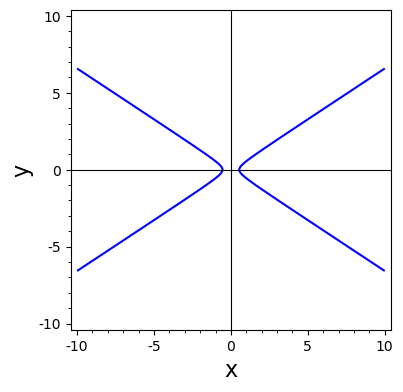

In [64]:
# границы графика кривой
x_range = (-10, 10)
y_range = (-10, 10)

# график кривой
graph = implicit_plot(graph_center, x_range, y_range)
graph.show(axes=True, axes_labels=['x', 'y'])


Также построим отцентрированный график поверхности второго порядка (как можно заметить, он оказался отцентрирован ещё на 3 шаге)

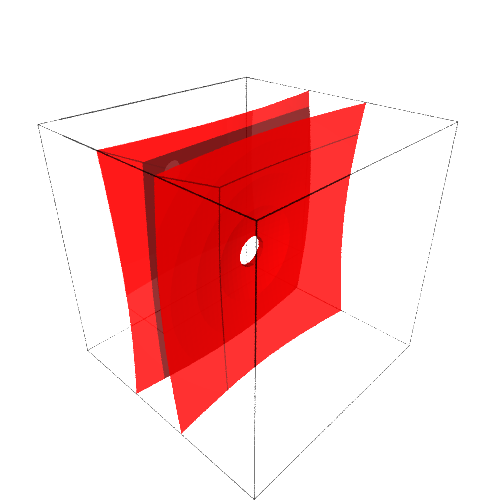

In [65]:
# границы графика поверхности
x_range = (-10, 10)
y_range = (-10, 10)
z_range = (-10, 10)

# график поверхности
P3d = implicit_plot3d(area_new, x_range, y_range, z_range, adaptive=True, color='red', opacity='0.9')
P3d.show(axis=True, viewer='tachyon')

## Вывод
В ходе работы над данным проектом мы научились работать с символьными вычислениями, строить графики кривых и плоскостей, а также решать задачи линейной алгебры с использованием SageMath.